### Lesson 1 (Naive Bayes)

In [ ]:
""" 
    This is the code to accompany the Lesson 1 (Naive Bayes) mini-project. 

    Use a Naive Bayes Classifier to identify emails by their authors
    
    authors and labels:
    Sara has label 0
    Chris has label 1
"""  
import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess
### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()

In [ ]:
from sklearn.naive_bayes import GaussianNB
t0 = time()
clf = GaussianNB()
clf.fit(features_train, labels_train)
print "training time:", round(time()-t0, 3), "s"
t0 = time()
pred = clf.predict(features_test)
print "predicting time:", round(time()-t0, 3), "s"

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred, labels_test)
print(accuracy)

### Lesson 2 (SVM) mini-project

In [ ]:
""" 
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:    
    Sara has label 0
    Chris has label 1
"""
import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()

from sklearn.svm import SVC
t0 = time()
clf = SVC(kernel="linear")
clf.fit(features_train, labels_train)
print "training time:", round(time()-t0, 3), "s"
t0 = time()
pred = clf.predict(features_test)
print "training time:", round(time()-t0, 3), "s"

from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, labels_test)

print(acc)

In [ ]:
features_train, features_test, labels_train, labels_test = preprocess()
#features_train = features_train[:len(features_train)/1000] 
#labels_train = labels_train[:len(labels_train)/1000] 

from sklearn.svm import SVC
t0 = time()
clf = SVC(C = 10000.0, kernel="rbf")
clf.fit(features_train, labels_train)
print "training time:", round(time()-t0, 3), "s"
t0 = time()
pred = clf.predict(features_test)
print "training time:", round(time()-t0, 3), "s"

from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, labels_test)

print(acc)

In [ ]:
features_train, features_test, labels_train, labels_test = preprocess()
#features_train = features_train[:len(features_train)/1000] 
#labels_train = labels_train[:len(labels_train)/1000] 

from sklearn.svm import SVC
t0 = time()
clf = SVC(C = 10000.0, kernel="rbf")
clf.fit(features_train, labels_train)
print "training time:", round(time()-t0, 3), "s"
t0 = time()
pred = clf.predict(features_test)
print "training time:", round(time()-t0, 3), "s"

acc = accuracy_score(pred, labels_test)

print(acc)

In [ ]:
import numpy as np
print(np.sum(pred == 1))

### Lesson 2 Lesson 3 (decision tree)

In [ ]:
import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess
from sklearn import tree
from sklearn.metrics import accuracy_score

In [ ]:
features_train, features_test, labels_train, labels_test = preprocess()
features_train.shape


In [ ]:
clf = tree.DecisionTreeClassifier(min_samples_split=40)
clf = clf.fit(features_train, features_train)
pred = clf.predict(features_test)

#print(clf.score(features_test, labels_test))
acc = accuracy_score(pred, labels_test)

print(acc)

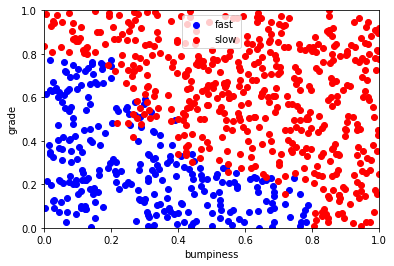

0.924


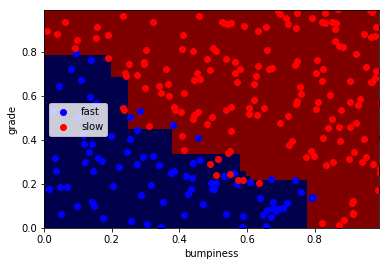

In [7]:
import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture
from sklearn.metrics import accuracy_score

features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################


### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary

from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
acc = accuracy_score(pred, labels_test)



try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass
print(acc)

In [40]:

""" 
    Starter code for exploring the Enron dataset (emails + finances);
    loads up the dataset (pickled dict of dicts).

    The dataset has the form:
    enron_data["LASTNAME FIRSTNAME MIDDLEINITIAL"] = { features_dict }

    {features_dict} is a dictionary of features associated with that person.
    You should explore features_dict as part of the mini-project,
    but here's an example to get you started:

    enron_data["SKILLING JEFFREY K"]["bonus"] = 5600000
    
"""

import pickle
import pandas as pd
enron_data = pickle.load(open("../final_project/final_project_dataset.pkl", "r"))

In [10]:
len(enron_data)

146

In [11]:
enron_data.values()

[{'bonus': 600000,
  'deferral_payments': 'NaN',
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'mark.metts@enron.com',
  'exercised_stock_options': 'NaN',
  'expenses': 94299,
  'from_messages': 29,
  'from_poi_to_this_person': 38,
  'from_this_person_to_poi': 1,
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 1740,
  'poi': False,
  'restricted_stock': 585062,
  'restricted_stock_deferred': 'NaN',
  'salary': 365788,
  'shared_receipt_with_poi': 702,
  'to_messages': 807,
  'total_payments': 1061827,
  'total_stock_value': 585062},
 {'bonus': 1200000,
  'deferral_payments': 1295738,
  'deferred_income': -1386055,
  'director_fees': 'NaN',
  'email_address': 'NaN',
  'exercised_stock_options': 6680544,
  'expenses': 11200,
  'from_messages': 'NaN',
  'from_poi_to_this_person': 'NaN',
  'from_this_person_to_poi': 'NaN',
  'loan_advances': 'NaN',
  'long_term_incentive': 1586055,
  'other': 2660303,
  'poi': False,
  'restricted_stock': 394

In [16]:
len(enron_data.keys())

146

In [17]:
len(enron_data['METTS MARK'])

21

In [23]:
df = pd.DataFrame.from_dict(enron_data, orient='index')

In [35]:
df

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,...,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,...,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,...,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN
BAZELIDES PHILIP J,80818,NaN,684694,860136,1599641,NaN,NaN,NaN,NaN,1599641,...,NaN,NaN,874,NaN,False,NaN,NaN,93750,NaN,NaN
BECK SALLY W,231330,7315,NaN,969068,NaN,700000,126027,2639,NaN,126027,...,NaN,4343,566,386,False,NaN,NaN,NaN,sally.beck@enron.com,144
BELDEN TIMOTHY N,213999,7991,2144013,5501630,953136,5249999,157569,5521,NaN,1110705,...,NaN,484,210698,108,True,NaN,-2334434,NaN,tim.belden@enron.com,228
BELFER ROBERT,NaN,NaN,-102500,102500,3285,NaN,NaN,NaN,44093,-44093,...,NaN,NaN,NaN,NaN,False,3285,NaN,NaN,NaN,NaN
BERBERIAN DAVID,216582,NaN,NaN,228474,1624396,NaN,869220,NaN,NaN,2493616,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,david.berberian@enron.com,NaN


In [31]:
len(df[df['poi'] == True])

18

In [33]:
poi = pd.read_csv('../final_project/poi_names.txt', skiprows=1, header=None)

'No. of POIs in textfile:', len(poi)

('No. of POIs in textfile:', 35)

In [34]:
poi.head()

,0,1
0,(y) Lay,Kenneth
1,(y) Skilling,Jeffrey
2,(n) Howard,Kevin
3,(n) Krautz,Michael
4,(n) Yeager,Scott


In [36]:
df.loc['PRENTICE JAMES', 'total_stock_value']

1095040

In [38]:
df.columns

Index([u'salary', u'to_messages', u'deferral_payments', u'total_payments',
       u'exercised_stock_options', u'bonus', u'restricted_stock',
       u'shared_receipt_with_poi', u'restricted_stock_deferred',
       u'total_stock_value', u'expenses', u'loan_advances', u'from_messages',
       u'other', u'from_this_person_to_poi', u'poi', u'director_fees',
       u'deferred_income', u'long_term_incentive', u'email_address',
       u'from_poi_to_this_person'],
      dtype='object')

In [43]:
df.loc['COLWELL WESLEY', 'from_this_person_to_poi']

11

In [45]:
df.total_payments = pd.to_numeric(df.total_payments, errors='coerce')
print(df.reindex(['LAY KENNETH L', 'SKILLING JEFFREY K', 'FASTOW ANDREW S']).loc[:,'total_payments'])


LAY KENNETH L         103559793.0
SKILLING JEFFREY K      8682716.0
FASTOW ANDREW S         2424083.0
Name: total_payments, dtype: float64


In [46]:
df.salary = pd.to_numeric(df.salary, errors='coerce')
print('No. of people with quantified salary:', df.salary.count())
print('No. of people with quantified emails:', len(df[df.email_address != 'NaN']))

('No. of people with quantified salary:', 95)
('No. of people with quantified emails:', 111)


In [47]:
df

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,2902,2869717,4484442.0,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466.0,257817,NaN,NaN,NaN,NaN,257817,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477.0,566,NaN,916197.0,4046157,NaN,1757552,465,-560222,5243487,...,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102.0,NaN,1295738,5634343.0,6680544,1200000,3942714,NaN,NaN,10623258,...,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671.0,NaN,260455,827696.0,NaN,400000,145796,NaN,-82782,63014,...,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN
BAZELIDES PHILIP J,80818.0,NaN,684694,860136.0,1599641,NaN,NaN,NaN,NaN,1599641,...,NaN,NaN,874,NaN,False,NaN,NaN,93750,NaN,NaN
BECK SALLY W,231330.0,7315,NaN,969068.0,NaN,700000,126027,2639,NaN,126027,...,NaN,4343,566,386,False,NaN,NaN,NaN,sally.beck@enron.com,144
BELDEN TIMOTHY N,213999.0,7991,2144013,5501630.0,953136,5249999,157569,5521,NaN,1110705,...,NaN,484,210698,108,True,NaN,-2334434,NaN,tim.belden@enron.com,228
BELFER ROBERT,NaN,NaN,-102500,102500.0,3285,NaN,NaN,NaN,44093,-44093,...,NaN,NaN,NaN,NaN,False,3285,NaN,NaN,NaN,NaN
BERBERIAN DAVID,216582.0,NaN,NaN,228474.0,1624396,NaN,869220,NaN,NaN,2493616,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,david.berberian@enron.com,NaN


In [ ]:

""" 
    A general tool for converting data from the
    dictionary format to an (n x k) python list that's 
    ready for training an sklearn algorithm

    n--no. of key-value pairs in dictonary
    k--no. of features being extracted

    dictionary keys are names of persons in dataset
    dictionary values are dictionaries, where each
        key-value pair in the dict is the name
        of a feature, and its value for that person

    In addition to converting a dictionary to a numpy 
    array, you may want to separate the labels from the
    features--this is what targetFeatureSplit is for

    so, if you want to have the poi label as the target,
    and the features you want to use are the person's
    salary and bonus, here's what you would do:

    feature_list = ["poi", "salary", "bonus"] 
    data_array = featureFormat( data_dictionary, feature_list )
    label, features = targetFeatureSplit(data_array)

    the line above (targetFeatureSplit) assumes that the
    label is the _first_ item in feature_list--very important
    that poi is listed first!
"""


import numpy as np

def featureFormat( dictionary, features, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False):
    """ convert dictionary to numpy array of features
        remove_NaN = True will convert "NaN" string to 0.0
        remove_all_zeroes = True will omit any data points for which
            all the features you seek are 0.0
        remove_any_zeroes = True will omit any data points for which
            any of the features you seek are 0.0
        sort_keys = True sorts keys by alphabetical order. Setting the value as
            a string opens the corresponding pickle file with a preset key
            order (this is used for Python 3 compatibility, and sort_keys
            should be left as False for the course mini-projects).
        NOTE: first feature is assumed to be 'poi' and is not checked for
            removal for zero or missing values.
    """


    return_list = []

    # Key order - first branch is for Python 3 compatibility on mini-projects,
    # second branch is for compatibility on final project.
    if isinstance(sort_keys, str):
        import pickle
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print "error: key ", feature, " not present"
                return
            value = dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value = 0
            tmp_list.append( float(value) )

        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != "NaN":
                    append = True
                    break
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or "NaN" in test_list:
                append = False
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )

    return np.array(return_list)


def targetFeatureSplit( data ):
    """ 
        given a numpy array like the one returned from
        featureFormat, separate out the first feature
        and put it into its own list (this should be the 
        quantity you want to predict)

        return targets and features as separate lists

        (sklearn can generally handle both lists and numpy arrays as 
        input formats when training/predicting)
    """

    target = []
    features = []
    for item in data:
        target.append( item[0] )
        features.append( item[1:] )

    return target, features






In [50]:
df = pd.DataFrame.from_dict(enron_data, orient='index')
print(df.head())
print(df.info())
print('*' * 20)

# Quiz 13: Number of people in dataset
print('\n----- Quiz 13 -----')
print('No. of people in dataset:', len(df))

# Quiz 14: Number of features for each person
print('\n----- Quiz 14 -----')
print('No. of features per person:', len(df.columns))

# Quiz 15: Number of POIs in dataset
print('\n----- Quiz 15 -----')
num_poi = len(df[df.poi == True])
print('No. of POIs in dataset:', num_poi)

# Quiz 16: Number of POIs in textfile
print('\n----- Quiz 16 -----')
poi = pd.read_csv('../final_project/poi_names.txt', skiprows=1, header=None)
print(poi.head())
print('No. of POIs in textfile:', len(poi))

# Quiz 18: Total stock value belonging to James Prentice
print('\n----- Quiz 18 -----')
print('Total stock value of James Prentice:', df.loc['PRENTICE JAMES', 'total_stock_value'])

# Quiz 19: Number of emails messages from Wesley Colwell to POIs
print('\n----- Quiz 19 -----')
print('No. of emails messages from Wesley Colwell to POIs:',
      df.loc['COLWELL WESLEY', 'from_this_person_to_poi'])

# Quiz 20: Value of stock options exercised by Jeffrey K Skilling
print('\n----- Quiz 20 -----')
print('Value of stock options exercised by Jeffrey K Skilling:',
      df.loc['SKILLING JEFFREY K', 'exercised_stock_options'])

# Quiz 25: Of these three individuals (Lay, Skilling and Fastow), who took home the most money?
print('\n----- Quiz 25 -----')
df.total_payments = pd.to_numeric(df.total_payments, errors='coerce')
print(df.reindex(['LAY KENNETH L', 'SKILLING JEFFREY K', 'FASTOW ANDREW S']).loc[:,'total_payments'])

# Quiz 27: Number of people with quantified salary
# Quiz 27: Number of quantified emails
print('\n----- Quiz 27 -----')
df.salary = pd.to_numeric(df.salary, errors='coerce')
print('No. of people with quantified salary:', df.salary.count())
print('No. of people with quantified emails:', len(df[df.email_address != 'NaN']))

# Quiz 29: What percentage of people in the dataset have “NaN” for their total payments?
print('\n----- Quiz 29 -----')
num_nan_payments = df.total_payments.isna().sum()
print('Percentage of people with "NaN" total payments:', num_nan_payments / len(df.total_payments) * 100)

# Quiz 30: What percentage of POIs have “NaN” for their total payments?
print('\n----- Quiz 30 -----')
num_poi_nan_payments = df.total_payments[df.poi == True].isna().sum()
print('Percentage of POIs with "NaN" total payments:', num_poi_nan_payments / num_poi * 100)

# Quiz 32: New number of people in dataset / New number of 'NaN' total payments
print('\n----- Quiz 32 -----')
print('New no. of people in dataset:', len(df) + 10)
print('New no. of "NaN" total payments:', num_nan_payments + 10)

# Quiz 33: New number of POIs / New number of POIs with 'NaN' total payments
print('\n----- Quiz 33 -----')
print('New no. of POIs:', num_poi + 10)
print('New no. of POIs with "NaN" total payments:', num_poi_nan_payments + 10)


                    salary to_messages deferral_payments total_payments  \
ALLEN PHILLIP K     201955        2902           2869717        4484442   
BADUM JAMES P          NaN         NaN            178980         182466   
BANNANTINE JAMES M     477         566               NaN         916197   
BAXTER JOHN C       267102         NaN           1295738        5634343   
BAY FRANKLIN R      239671         NaN            260455         827696   

                   exercised_stock_options    bonus restricted_stock  \
ALLEN PHILLIP K                    1729541  4175000           126027   
BADUM JAMES P                       257817      NaN              NaN   
BANNANTINE JAMES M                 4046157      NaN          1757552   
BAXTER JOHN C                      6680544  1200000          3942714   
BAY FRANKLIN R                         NaN   400000           145796   

                   shared_receipt_with_poi restricted_stock_deferred  \
ALLEN PHILLIP K                       1407  